# Machine Learning Ex1

### Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import KNNImputer

### Configuration

In [102]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]

# define plt and sns styles
sns.set_style("whitegrid")
sns.set_palette("Set2")

## Data Loading

In [103]:
df_train = pd.read_csv('data/CongressionalVotingID.shuf.lrn.csv')
df_train.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,249,republican,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,140,democrat,y,n,y,n,n,y,y,y,y,n,n,n,n,n,y,y
2,383,democrat,y,y,n,y,y,y,n,n,n,n,y,n,y,y,n,unknown
3,201,democrat,n,n,y,n,n,n,y,y,y,n,n,n,n,y,y,y
4,297,republican,n,n,y,y,y,y,n,n,n,y,n,y,y,y,y,y


In [104]:
X_test = pd.read_csv('data/CongressionalVotingID.shuf.tes.csv')
X_test.head()

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,102,y,n,y,n,y,y,y,n,n,n,y,n,n,y,n,y
1,413,n,n,n,y,y,y,n,n,n,y,n,y,y,y,n,y
2,30,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
3,298,y,y,y,n,n,y,y,y,y,y,n,n,unknown,n,y,unknown
4,95,y,n,y,n,y,y,n,n,n,n,n,n,n,n,n,y


In [105]:
df_train.describe()

,ID
count,218.000000
mean,220.683486
std,123.133683
min,2.000000
25%,119.250000
50%,224.000000
75%,322.500000
max,435.000000


<Axes: >

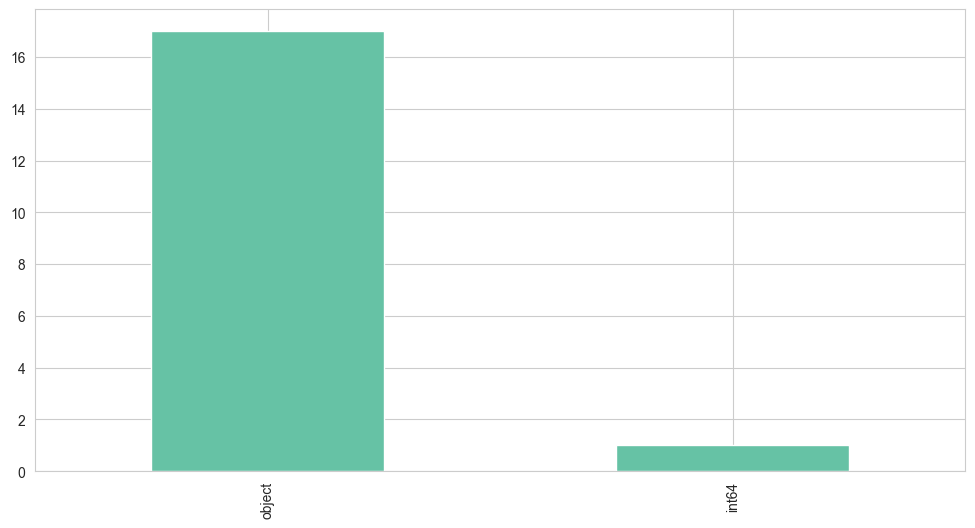

In [106]:
df_train.dtypes.value_counts().plot(kind='bar')

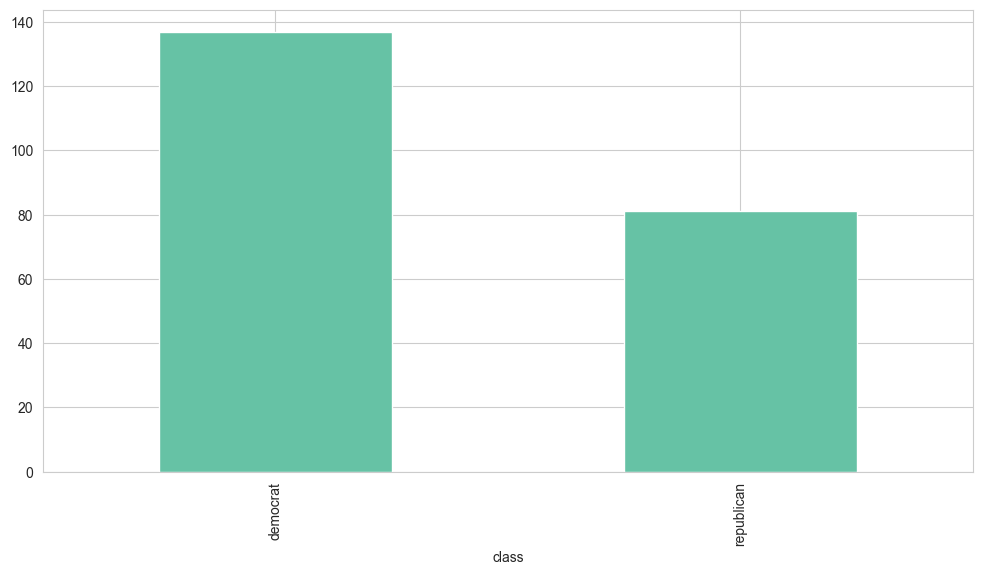

In [107]:
df_train['class'].value_counts().plot(kind='bar')
plt.savefig('images/class_distribution.png')

In [108]:
# Count the number of unique labels
len(df_train['class'].unique())


2

In [109]:
for column in df_train.columns:
    unique_values = df_train[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

Column: ID, Unique Values: [249 140 383 201 297 309 308 420 263 181 390 318 407 394 374 168 265  41
 183   5 165   2 422  70  91 323 398 391 355 142 199  66  23 219 116 372
 370 146 334  33 349 143 403 241 424 205 361 243 163 427 360 157 135 301
  10 373 208 429 401 180 176 202 369 400 392 325 304 338 435 200 333 123
  15  47 315  40 268 426 272  64  58 149  17 255 117  11 267 137 173 293
 299 225  88  71 214  45   7 235 414 164 233 260 218 303 428 276 321 412
 364  21 107 227 288 138 109 169 382 285 379 139 240 193 257 395 332  24
 104 279 313 222 236 359 131  86 192 239 367 115 141 207 280 244 270  99
 296 188  56 171  52  68 328 289  16 213 386 129 186 405  87 339  12  54
 177 150 246  60 210 100   9 238 156 103 112 266 282 113 397  57 335 290
 223 353 120 410  28 190 358 347  96 306 110 119  14 228 194   3  51 151
 316 127 320 314 326 158 170   6 345 269 261  18 291  90 178 106 271 275
 354 324]
Column: class, Unique Values: ['republican' 'democrat']
Column: handicapped-infants, Un

## Data Cleaning and Preprocessing


In [110]:
# Setting the ID column as index
df_train.set_index('ID', inplace=True)
X_test.set_index('ID', inplace=True)

# Splitting of the target column
X_train = df_train.drop('class', axis=1)
y_train = df_train['class']
X_train.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
ID,,,,,,,,,,,,,,,,
249,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
140,y,n,y,n,n,y,y,y,y,n,n,n,n,n,y,y
383,y,y,n,y,y,y,n,n,n,n,y,n,y,y,n,unknown
201,n,n,y,n,n,n,y,y,y,n,n,n,n,y,y,y
297,n,n,y,y,y,y,n,n,n,y,n,y,y,y,y,y


In [111]:
X_train.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
ID,,,,,,,,,,,,,,,,
249,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
140,y,n,y,n,n,y,y,y,y,n,n,n,n,n,y,y
383,y,y,n,y,y,y,n,n,n,n,y,n,y,y,n,unknown
201,n,n,y,n,n,n,y,y,y,n,n,n,n,y,y,y
297,n,n,y,y,y,y,n,n,n,y,n,y,y,y,y,y


In [112]:
ynmap = {'y': 1, 'n': 0, '?': np.nan}

columns_to_map = [
    'handicapped-infants',
    'water-project-cost-sharing',
    'adoption-of-the-budget-resolution',
    'physician-fee-freeze',
    'el-salvador-aid', 
    'religious-groups-in-schools',
    'anti-satellite-test-ban', 
    'aid-to-nicaraguan-contras',
    'mx-missile',
    'immigration',
    'synfuels-crporation-cutback',
    'education-spending',
    'superfund-right-to-sue',
    'crime',
    'duty-free-exports',
    'export-administration-act-south-africa'
]

for column in columns_to_map:
    X_train[column] = X_train[column].map(ynmap)
    X_train.rename(columns={column: column.replace('-', ' ').title()}, inplace=True)

for column in columns_to_map:
    X_test[column] = X_test[column].map(ynmap)
    X_test.rename(columns={column: column.replace('-', ' ').title()}, inplace=True)

In [113]:
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size=0.3, random_state=420, stratify=y_train)
    
# Check unique labels in y_train and y_vali
missing_labels = set(y_vali.unique()) - set(y_train.unique())
assert len(missing_labels) == 0, "Labels in y_test not in y_train"

In [114]:
# Checking the shapes
print(f'X_train shape: {X_train.shape}')
print(f'X_vali shape: {X_vali.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_vali shape: {y_vali.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (152, 16)
X_vali shape: (66, 16)
y_train shape: (152,)
y_vali shape: (66,)
X_test shape: (217, 16)


### Checking for missing values

In [115]:
# Checking for null values
print(f'Amount null values in X_train: {X_train.isnull().sum().sum()}')
print(f'Amount null values in X_vali: {X_vali.isnull().sum().sum()}')
print(f'Amount null values in y_train: {y_train.isnull().sum().sum()}')
print(f'Amount null values in y_vali: {y_vali.isnull().sum().sum()}')
print(f'Amount null values in X_test: {X_test.isnull().sum().sum()}')

Amount null values in X_train: 152
Amount null values in X_vali: 54
Amount null values in y_train: 0
Amount null values in y_vali: 0
Amount null values in X_test: 186


In [116]:
X_test.columns[X_test.isnull().any()]

Index(['Handicapped Infants', 'Water Project Cost Sharing',
       'Adoption Of The Budget Resolution', 'Physician Fee Freeze',
       'El Salvador Aid', 'Religious Groups In Schools',
       'Anti Satellite Test Ban', 'Aid To Nicaraguan Contras', 'Mx Missile',
       'Immigration', 'Synfuels Crporation Cutback', 'Education Spending',
       'Superfund Right To Sue', 'Crime', 'Duty Free Exports',
       'Export Administration Act South Africa'],
      dtype='object')

### Converting target variable to numeric

Converting a categorical variable like this we have (names of people who wrote the review). Would usually result in using One-Hot Encoding, but the column is our target. For most classification algorithms its not necessary to transform our classification problem into a multiclass problem as many classification algorithms (XGboost, DecisionTrees, kNN and SVM) don't intepret a relationship between the labels.

Warning: Methods like neural networks, especially those using softmax intepret relationships between labels.

In [130]:
label_encoder = LabelEncoder()
y_train_temp = label_encoder.fit_transform(y_train)

y_vali_temp = label_encoder.transform(y_vali)

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

y_train_numeric_labels = pd.DataFrame(y_train_temp, columns=['Class'], index=y_train.index)
y_vali_numeric_labels = pd.DataFrame(y_vali_temp, columns=['Class'], index=y_vali.index)

y_train_numeric_labels.head()

,Class
ID,
280,1
293,0
424,0
303,1
116,0


In [14]:
label_mapping.keys()

dict_keys(['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky', 'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn', 'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes', 'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt', 'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison', 'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin', 'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])

<Axes: >

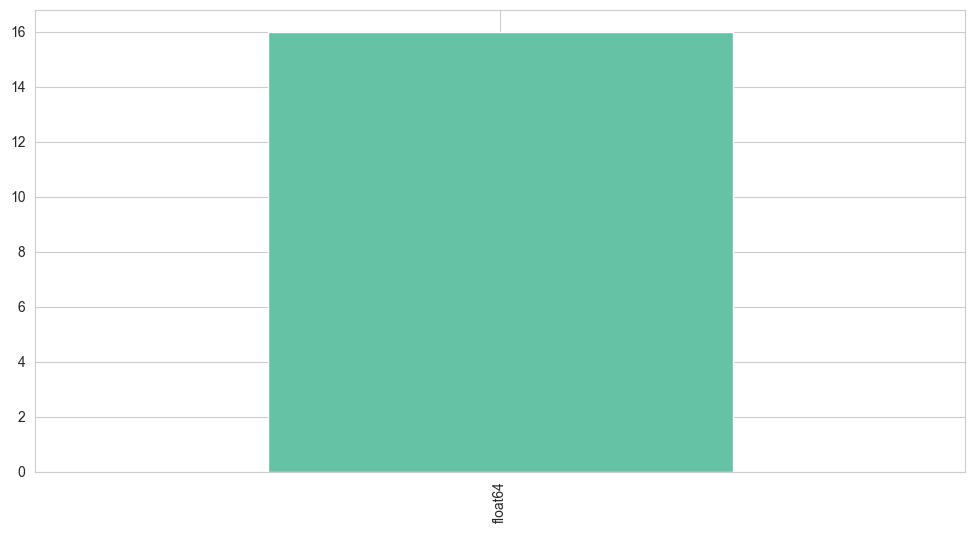

In [195]:
# plot dtypes of X_train
X_train.dtypes.value_counts().plot(kind='bar')

## Methods

In [214]:
def impute_missing(X_train, X_vali):
    imputer = KNNImputer(n_neighbors=5)

    # impute missing values
    X_train_imputed = imputer.fit_transform(X_train)
    X_vali_imputed = imputer.transform(X_vali)

    df_train_scaled = pd.DataFrame(X_train_imputed, columns=X_train.columns)
    df_vali_scaled = pd.DataFrame(X_vali_imputed, columns=X_vali.columns)

    return df_train_scaled, df_vali_scaled

In [215]:
def delete_rows_with_missing_values(X_train, X_vali, y_train, y_vali):
    # Get the indices of the rows to keep
    train_indices = X_train.dropna().index.tolist()
    vali_indices = X_vali.dropna().index.tolist()

    # Drop rows from the numpy arrays using the indices
    y_train = y_train[train_indices]
    y_vali = y_vali[vali_indices]

    # Drop rows from the DataFrames
    X_train = X_train.dropna()
    X_vali = X_vali.dropna()

    return X_train, X_vali, y_train, y_vali

In [216]:
def apply_scaling(X_train, X_vali):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_vali_scaled = scaler.transform(X_vali)

    df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    df_vali_scaled = pd.DataFrame(X_vali_scaled, columns=X_vali.columns)

    return df_train_scaled, df_vali_scaled

In [217]:
def apply_outlier_removal(X_train, y_train, factor=1.5):
    # Calculate the IQR for each column
    Q1 = np.quantile(X_train, 0.25, axis=0)
    Q3 = np.quantile(X_train, 0.75, axis=0)
    IQR = Q3 - Q1

    # Outlier detection
    outliers = (X_train < Q1 - factor * IQR) | (X_train > Q3 + factor * IQR)

    # The dataset has many columns with outliers, 
    # so we will remove rows where the number of 
    # outliers exceeds 10% of the total number of columns
    threshold = max(1, int(0.1 * X_train.shape[1]))
    rows_to_remove = outliers.sum(axis=1) >= threshold

    # Only remove rows where the number of outliers exceeds the maximum
    X_clean = X_train[~rows_to_remove]
    y_clean = y_train[~rows_to_remove]

    return X_clean, y_clean

In [218]:
def calculate_optimal_pca(X_train):
    pca = PCA()
    pca.fit(X_train)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # plt.figure()
    # plt.plot(explained_variance)
    # plt.xlabel('Number of Components')
    # plt.ylabel('Variance (%)')
    # plt.title('Explained Variance')
    # plt.grid(True)
    # plt.show()

    n_components = np.where(explained_variance > 0.95)[0][0] + 1
    return n_components

In [219]:
def apply_pca(X_train, X_vali, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_vali_pca = pca.transform(X_vali)

    X_train_pca = pd.DataFrame(data=X_train_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
    X_vali_pca = pd.DataFrame(data=X_vali_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

    return X_train_pca, X_vali_pca

## Modeling

In [220]:
# Main experiment function
def run_experiment(X_train, X_vali, y_train, y_vali, algorithm_func, use_pca=False, remove_outliers=False, scale_data=False, impute_missing_values=False):

    if impute_missing_values:
        X_train, X_vali = impute_missing(X_train, X_vali)
    else:
        X_train, X_vali, y_train, y_vali = delete_rows_with_missing_values(X_train, X_vali, y_train, y_vali)

    if remove_outliers:
        X_train, y_train = apply_outlier_removal(X_train, y_train) 
        assert X_train.shape[0] == y_train.shape[0], "X_train and y_train should have the same amount of rows"
        assert X_train.shape[0] > 0, "X_train has no rows left"

    if scale_data:
        X_train, X_vali = apply_scaling(X_train, X_vali)

    if use_pca:
        n_components = calculate_optimal_pca(X_train)
        X_train, X_vali = apply_pca(X_train, X_vali, n_components)

    prediction = algorithm_func.fit(X_train, y_train).predict(X_vali)

    conf_matrix = confusion_matrix(y_vali, prediction)

    metrics = {
        'accuracy': accuracy_score(prediction, y_vali),
        'precision': precision_score(prediction, y_vali, average='macro', zero_division=1),
        'recall': recall_score(prediction, y_vali, average='macro', zero_division=1),
        'f1': f1_score(prediction, y_vali, average='macro')
    }
    return metrics, conf_matrix

In [221]:
from sklearn.model_selection import KFold

def run_experiment_with_changes_cv(X_train, X_vali, y_train, y_vali, algorithm_func, use_pca=False, remove_outliers=False, scale_data=False, impute_missing_values=False):

    # Concatenate the training and validation sets
    X_train = pd.concat([X_train, X_vali])
    y_train = np.concatenate([y_train, y_vali])

    # Initialize KFold cross-validation
    kfold = KFold(n_splits=3)

    # Initialize a overall confusion matrix based on the number of classes
    unique_classes = np.unique(y_train)
    overall_confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))


    results_per_fold = []

    # Perform cross-validation
    for train_index, vali_index in kfold.split(X_train):
        # Split the training data into training and validation sets
        X_train_cv, X_vali_cv = X_train.iloc[train_index], X_train.iloc[vali_index]
        y_train_cv, y_vali_cv = y_train[train_index], y_train[vali_index]

        # Apply imputation if necessary
        if impute_missing_values:
            X_train_cv, X_vali_cv = impute_missing(X_train_cv, X_vali_cv)
        else:
            X_train_cv, X_vali_cv, y_train_cv, y_vali_cv = delete_rows_with_missing_values(X_train_cv, X_vali_cv, y_train_cv, y_vali_cv)

        # Apply outlier removal if necessary
        if remove_outliers:
            X_train_cv, y_train_cv = apply_outlier_removal(X_train_cv, y_train_cv)
            assert X_train_cv.shape[0] == y_train_cv.shape[0], "X_train and y_train should have the same amount of rows"
            assert X_train_cv.shape[0] > 0, "X_train has no rows left"

        # Apply scaling if necessary
        if scale_data:
            X_train_cv, X_vali_cv = apply_scaling(X_train_cv, X_vali_cv)

        # Apply PCA if necessary
        if use_pca:
            n_components = calculate_optimal_pca(X_train_cv)
            X_train_cv, X_vali_cv = apply_pca(X_train_cv, X_vali_cv, n_components=n_components)

        # Initialize GridSearchCV with the estimator returned by algorithm_func
        prediction = algorithm_func.fit(X_train_cv, y_train_cv).predict(X_vali_cv)

        overall_confusion_matrix += confusion_matrix(y_vali_cv, prediction)

        metrics = {
            'accuracy': accuracy_score(prediction, y_vali_cv),
            'precision': precision_score(prediction, y_vali_cv, average='macro', zero_division=1),
            'recall': recall_score(prediction, y_vali_cv, average='macro', zero_division=1),
            'f1': f1_score(prediction, y_vali_cv, average='macro')
        }
        results_per_fold.append(metrics)

    cv_results_df = pd.DataFrame(results_per_fold)
    # just return the mean for every metric
    mean_metrics = cv_results_df.mean().to_dict()

    return mean_metrics, overall_confusion_matrix

In [222]:
from sklearn.model_selection import ParameterGrid
import time
results = []

param_grid = {
    'decision_tree_classifier': list(ParameterGrid({
        'max_depth': [10, 50, 100],
        'min_samples_split': [2, 10, 20]
    })),
    'svm_classifier': list(ParameterGrid({
        'C': [0.01, 0.1, 1],
        'kernel': ['linear', 'rbf'],
    })),
    'knn_classifier': list(ParameterGrid({
        'n_neighbors': [3, 5, 10],
    }))
}

algorithms = {
        'decision_tree_classifier': DecisionTreeClassifier(),
        'svm_classifier': SVC(),
        'knn_classifier': KNeighborsClassifier()
    }

for algorithm_key, algorithm in algorithms.items():
    print(f'Starting with {algorithm_key}...')
    if algorithm_key in param_grid:
        for use_pca in [True, False]:
            for scale_data in [True, False]:
                for remove_outliers in [True, False]:
                    for impute_missing_values in [True, False]:
                        for validation_method in ['cross_validation', 'holdout']:

                            print(f'Running {algorithm_key} with use_pca={use_pca}, scale_data={scale_data}, remove_outliers={remove_outliers}, impute_missing_values={impute_missing_values} validation_method={validation_method}...')
                            if validation_method == 'holdout':
                                default_algorithm = type(algorithm)()
                                start_time = time.time()
                                metrics, conf_matrix = run_experiment(
                                    X_train, 
                                    X_vali, 
                                    y_train_numeric_labels.iloc[:, 0].values, 
                                    y_vali_numeric_labels.iloc[:, 0].values, 
                                    algorithm, 
                                    use_pca, 
                                    remove_outliers, 
                                    scale_data,
                                    impute_missing_values
                                )
                                end_time = time.time()
                                results.append({
                                'algorithm': algorithm_key,
                                'validation_method': validation_method,
                                'remove_outliers': remove_outliers,
                                'scale_data': scale_data,
                                'use_pca': use_pca,
                                'impute_missing_values': impute_missing_values,
                                'params': 'default',
                                'time': end_time - start_time,
                                'conf_matrix': conf_matrix.tolist(), # Convert to list to be able to serialize to JSON
                                **metrics
                                })
                            elif validation_method == 'cross_validation':
                                # loop over the parameters for the current algorithm
                                for param in param_grid[algorithm_key]:
                                    algorithm.set_params(**param)
                                    start_time = time.time()
                                    mean_metrics, conf_matrix = run_experiment_with_changes_cv(
                                        X_train, 
                                        X_vali, 
                                        y_train_numeric_labels.iloc[:, 0].values, 
                                        y_vali_numeric_labels.iloc[:, 0].values, 
                                        algorithm,  # Pass the algorithm instance, not the string
                                        use_pca, 
                                        remove_outliers, 
                                        scale_data,
                                        impute_missing_values
                                    )
                                    end_time = time.time()
                                    results.append({
                                        'algorithm': algorithm_key,
                                        'validation_method': validation_method,
                                        'remove_outliers': remove_outliers,
                                        'scale_data': scale_data,
                                        'use_pca': use_pca,
                                        'impute_missing_values': impute_missing_values,
                                        'params': param,
                                        'time': end_time - start_time,
                                        'conf_matrix': conf_matrix.tolist(),
                                        **mean_metrics
                                    })
                                break
                            break
                        break
                break
            break
        break
    break
    print('\n\n')

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

Starting with decision_tree_classifier...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=True, impute_missing_values=True validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=False, impute_missing_values=True validation_method=cross_validation...


In [223]:
results_df.sort_values(by='accuracy', ascending=False)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,impute_missing_values,params,time,conf_matrix,accuracy,precision,recall,f1
6,decision_tree_classifier,cross_validation,True,True,True,True,"{'max_depth': 100, 'min_samples_split': 2}",0.072056,"[[129.0, 8.0], [11.0, 70.0]]",0.912798,0.903501,0.909872,0.905955
3,decision_tree_classifier,cross_validation,True,True,True,True,"{'max_depth': 50, 'min_samples_split': 2}",0.072998,"[[129.0, 8.0], [11.0, 70.0]]",0.912798,0.903501,0.909872,0.905955
14,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 50, 'min_samples_split': 20}",0.079999,"[[127.0, 10.0], [12.0, 69.0]]",0.899099,0.888680,0.894757,0.890227
11,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 10, 'min_samples_split': 20}",0.076005,"[[127.0, 10.0], [12.0, 69.0]]",0.899099,0.888680,0.894757,0.890227
12,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 50, 'min_samples_split': 2}",0.079998,"[[123.0, 14.0], [9.0, 72.0]]",0.894597,0.891693,0.884139,0.887101
17,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 100, 'min_samples_split': 20}",0.073688,"[[127.0, 10.0], [13.0, 68.0]]",0.894533,0.882210,0.890234,0.884255
0,decision_tree_classifier,cross_validation,True,True,True,True,"{'max_depth': 10, 'min_samples_split': 2}",0.085002,"[[130.0, 7.0], [16.0, 65.0]]",0.894280,0.876340,0.895652,0.883562
15,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 100, 'min_samples_split': 2}",0.072998,"[[128.0, 9.0], [15.0, 66.0]]",0.889967,0.873680,0.888302,0.878997
9,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 10, 'min_samples_split': 2}",0.074453,"[[120.0, 17.0], [9.0, 72.0]]",0.880771,0.880410,0.869032,0.873251
10,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 10, 'min_samples_split': 10}",0.073997,"[[121.0, 16.0], [11.0, 70.0]]",0.876268,0.870540,0.865251,0.866715


algorithm                                 decision_tree_classifier
validation_method                                 cross_validation
remove_outliers                                               True
scale_data                                                    True
use_pca                                                       True
impute_missing_values                                         True
params                   {'max_depth': 10, 'min_samples_split': 2}
time                                                      0.085002
conf_matrix                           [[130.0, 7.0], [16.0, 65.0]]
accuracy                                                   0.89428
precision                                                  0.87634
recall                                                    0.895652
f1                                                        0.883562
Name: 0, dtype: object


Text(0.5, 1.0, 'Confusion Matrix')

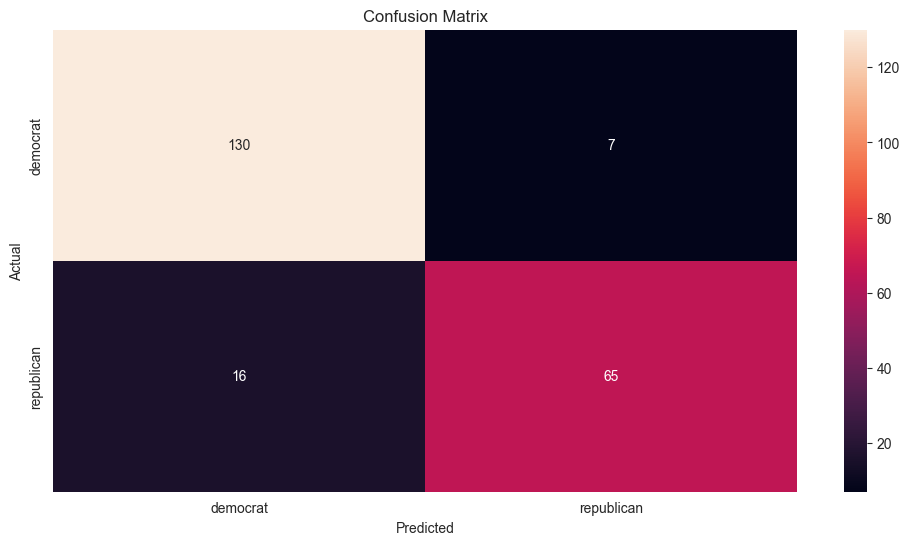

In [224]:
# plot the confusion matrix of the best model
print(results_df.iloc[0])
conf_matrix = np.array(results_df.iloc[0]['conf_matrix'])
conf_matrix = pd.DataFrame(conf_matrix, index=label_mapping.keys(), columns=label_mapping.keys())
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# plt.savefig('images/confusion_matrix.png')

In [225]:
results_df.sort_values(by='accuracy', ascending=False)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,impute_missing_values,params,time,conf_matrix,accuracy,precision,recall,f1
6,decision_tree_classifier,cross_validation,True,True,True,True,"{'max_depth': 100, 'min_samples_split': 2}",0.072056,"[[129.0, 8.0], [11.0, 70.0]]",0.912798,0.903501,0.909872,0.905955
3,decision_tree_classifier,cross_validation,True,True,True,True,"{'max_depth': 50, 'min_samples_split': 2}",0.072998,"[[129.0, 8.0], [11.0, 70.0]]",0.912798,0.903501,0.909872,0.905955
14,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 50, 'min_samples_split': 20}",0.079999,"[[127.0, 10.0], [12.0, 69.0]]",0.899099,0.888680,0.894757,0.890227
11,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 10, 'min_samples_split': 20}",0.076005,"[[127.0, 10.0], [12.0, 69.0]]",0.899099,0.888680,0.894757,0.890227
12,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 50, 'min_samples_split': 2}",0.079998,"[[123.0, 14.0], [9.0, 72.0]]",0.894597,0.891693,0.884139,0.887101
17,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 100, 'min_samples_split': 20}",0.073688,"[[127.0, 10.0], [13.0, 68.0]]",0.894533,0.882210,0.890234,0.884255
0,decision_tree_classifier,cross_validation,True,True,True,True,"{'max_depth': 10, 'min_samples_split': 2}",0.085002,"[[130.0, 7.0], [16.0, 65.0]]",0.894280,0.876340,0.895652,0.883562
15,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 100, 'min_samples_split': 2}",0.072998,"[[128.0, 9.0], [15.0, 66.0]]",0.889967,0.873680,0.888302,0.878997
9,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 10, 'min_samples_split': 2}",0.074453,"[[120.0, 17.0], [9.0, 72.0]]",0.880771,0.880410,0.869032,0.873251
10,decision_tree_classifier,cross_validation,False,True,True,True,"{'max_depth': 10, 'min_samples_split': 10}",0.073997,"[[121.0, 16.0], [11.0, 70.0]]",0.876268,0.870540,0.865251,0.866715


In [226]:
# save as csv
results_df.to_csv('results.csv', index=False)

In [227]:
results_df[results_df['validation_method'] == 'cross_validation'].sort_values(by='f1', ascending=False).groupby('algorithm').head(1)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,impute_missing_values,params,time,conf_matrix,accuracy,precision,recall,f1
6,decision_tree_classifier,cross_validation,True,True,True,True,"{'max_depth': 100, 'min_samples_split': 2}",0.072056,"[[129.0, 8.0], [11.0, 70.0]]",0.912798,0.903501,0.909872,0.905955


In [228]:
results_df[results_df['validation_method'] == 'holdout'].sort_values(by='f1', ascending=False).groupby('algorithm').head(1)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,impute_missing_values,params,time,conf_matrix,accuracy,precision,recall,f1


In [229]:
results_df = pd.read_csv('results.csv')

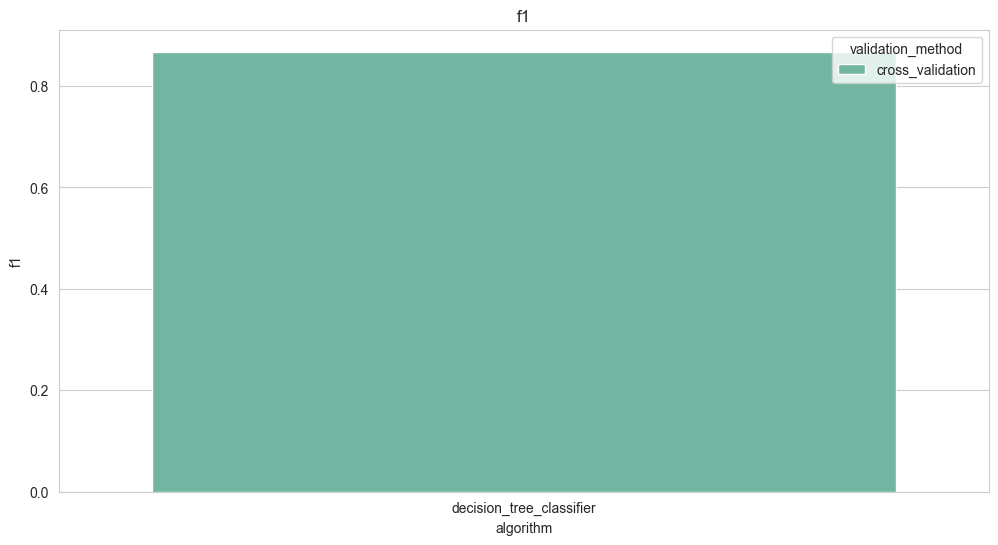

In [231]:
# plot the performance measures in comparision to each other
# TODO: Festlegung auf einen Score (f1)
sns.barplot(data=results_df, x='algorithm', y='f1', hue='validation_method', errorbar=None)
plt.title('f1')
plt.savefig('images/f1.png')

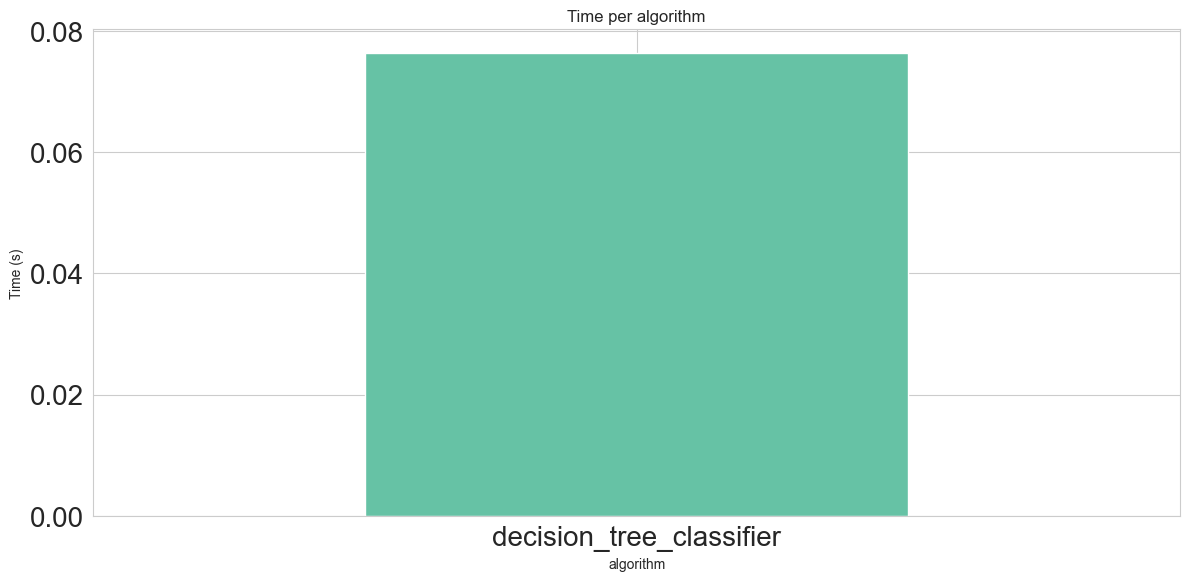

In [230]:
# plot the time difference between the models
results_df['time'] = results_df['time'].astype('float64')
results_df.groupby('algorithm')['time'].mean().plot(kind='bar')
plt.ylabel('Time (s)')
plt.xticks(rotation=0, ha='center')
# make text bigger
plt.gcf().axes[0].tick_params(labelsize=20)
# also make the other text bigger
plt.title('Time per algorithm', fontsize=20)
plt.tight_layout()
plt.title('Time per algorithm')
plt.savefig('images/time.png')

## Recreating best run for Kaggle Submission

In [380]:
label_encoder = LabelEncoder()
y_train_temp = label_encoder.fit_transform(df_train['Class'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

y_train_numeric_labels = pd.DataFrame(y_train_temp, columns=['Class'], index=df_train['Class'].index)

y_train_numeric_labels.head()

,Class
ID,
0,20
1,11
2,2
3,16
4,47


In [381]:
label_mapping

{'Agresti': 0,
 'Ashbacher': 1,
 'Auken': 2,
 'Blankenship': 3,
 'Brody': 4,
 'Brown': 5,
 'Bukowsky': 6,
 'CFH': 7,
 'Calvinnme': 8,
 'Chachra': 9,
 'Chandler': 10,
 'Chell': 11,
 'Cholette': 12,
 'Comdet': 13,
 'Corn': 14,
 'Cutey': 15,
 'Davisson': 16,
 'Dent': 17,
 'Engineer': 18,
 'Goonan': 19,
 'Grove': 20,
 'Harp': 21,
 'Hayes': 22,
 'Janson': 23,
 'Johnson': 24,
 'Koenig': 25,
 'Kolln': 26,
 'Lawyeraau': 27,
 'Lee': 28,
 'Lovitt': 29,
 'Mahlers2nd': 30,
 'Mark': 31,
 'McKee': 32,
 'Merritt': 33,
 'Messick': 34,
 'Mitchell': 35,
 'Morrison': 36,
 'Neal': 37,
 'Nigam': 38,
 'Peterson': 39,
 'Power': 40,
 'Riley': 41,
 'Robert': 42,
 'Shea': 43,
 'Sherwin': 44,
 'Taylor': 45,
 'Vernon': 46,
 'Vision': 47,
 'Walters': 48,
 'Wilson': 49}

In [382]:
df_train.drop('Class', axis=1, inplace=True)
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
ID,,,,,,,,,,,,,,,,,,,,,
0,14,9,8,12,7,4,5,3,2,2,...,2,0,1,0,1,0,1,1,0,0
1,12,3,8,6,5,3,2,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2,17,5,7,12,8,3,0,3,2,3,...,0,0,1,0,0,0,0,1,0,0
3,9,6,10,6,4,7,7,3,3,3,...,0,0,0,0,0,2,0,0,0,0
4,8,4,5,5,1,7,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0


In [384]:
df_train_final, y_train_final = apply_outlier_removal(df_train, y_train_numeric_labels) 

df_train_final, X_test_final, X_test_final = apply_scaling(df_train_final, X_test, X_test)

n_components = calculate_optimal_pca(df_train_final)
df_train_final, X_test_final = apply_pca(df_train_final, X_test_final, n_components)

In [385]:
# save df_train_final and y_train_final as csv
df_train_final.to_csv('df_train_final.csv', index=False)
y_train_final.to_csv('y_train_final.csv', index=False)

In [387]:
df_train_final.shape

(750, 625)

In [359]:
params = {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

# initilize svc with these params from a dictionary
model = SVC(**params)

prediction = model.fit(df_train, y_train_numeric_labels).predict(X_test)

c:\Users\tomad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [360]:
# use the label_mapping to get the original labels
prediction = label_encoder.inverse_transform(prediction)
prediction

array(['Wilson', 'Brown', 'Blankenship', 'Corn', 'Messick', 'Vision',
       'Hayes', 'Kolln', 'Chachra', 'Brown', 'Morrison', 'Neal',
       'Morrison', 'Chachra', 'Kolln', 'Robert', 'Chachra', 'Vision',
       'Davisson', 'Mitchell', 'Cholette', 'Chachra', 'Auken', 'Neal',
       'Calvinnme', 'Nigam', 'Cutey', 'Blankenship', 'Nigam', 'Chachra',
       'Hayes', 'Chachra', 'McKee', 'Davisson', 'Shea', 'Brown',
       'Chachra', 'Ashbacher', 'Auken', 'Chell', 'Wilson', 'Davisson',
       'Agresti', 'Shea', 'CFH', 'Kolln', 'Brody', 'Calvinnme', 'Chell',
       'Sherwin', 'Agresti', 'Corn', 'Calvinnme', 'Comdet', 'Auken',
       'Chachra', 'Engineer', 'Chachra', 'Taylor', 'Koenig', 'Brown',
       'Nigam', 'Riley', 'Wilson', 'Comdet', 'Brown', 'Messick', 'CFH',
       'Calvinnme', 'Cholette', 'Chachra', 'Sherwin', 'Mark', 'Grove',
       'Walters', 'Kolln', 'Chachra', 'Chachra', 'Engineer', 'Messick',
       'Calvinnme', 'Chachra', 'Lawyeraau', 'Lee', 'Janson', 'Grove',
       'Grove', 'W

In [361]:
# transform the prediction to a dataframe with indexes started from 750
prediction = pd.DataFrame(prediction, columns=['Class'], index=X_test.index + 750)

# rename the index column to ID
prediction.index.names = ['ID']

# save prediction as csv
prediction.to_csv('prediction.csv')

,Class
ID,
0,20
1,11
2,2
3,16
4,47
...,...
745,18
746,36
747,7


In [364]:
params = {'learning_rate': [0.01],
        'n_estimators': [100],
        'max_depth': [10],
        'booster': ['gbtree'],
        'tree_method': ['hist'],
        'n_jobs': [-1],
        'device': ['cuda']}

model = XGBClassifier(params)

prediction = model.fit(df_train, y_train_numeric_labels).predict(X_test)
prediction = label_encoder.inverse_transform(prediction)
prediction = pd.DataFrame(prediction, columns=['Class'], index=X_test.index + 750)

# rename the index column to ID
prediction.index.names = ['ID']

# save prediction as csv
prediction.to_csv('XGBoost_prediction.csv')

c:\Users\tomad\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


In [365]:
df_train.shape

(750, 10001)

In [398]:
xgb_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='mlogloss')

# Parameters to test
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'learning_rate': [0.2, 0.3]
}

param_distributions = {
    'n_estimators': [140, 150, 160],
    'max_depth': [9, 10, 11],
    'learning_rate': [0.18, 0.2, 0.22],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.1]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions, n_iter=50, scoring='accuracy', cv=3, n_jobs=-1, random_state=0, verbose=2)
random_search.fit(df_train, y_train_numeric_labels)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
best_params, best_score

Fitting 3 folds for each of 50 candidates, totalling 150 fits


({'subsample': 0.8,
  'reg_lambda': 1,
  'reg_alpha': 0,
  'n_estimators': 160,
  'max_depth': 11,
  'learning_rate': 0.18,
  'gamma': 0,
  'colsample_bytree': 1},
 0.5746666666666665)

In [ ]:
({'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150},
 0.5173333333333333)
({'learning_rate': 0.3, 'max_depth': 20, 'n_estimators': 200},
 0.5013333333333333)
({'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150},
 0.5173333333333333)

In [399]:
final_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='mlogloss', **best_params)
pred = final_model.fit(df_train, y_train_numeric_labels).predict(X_test)
pred = label_encoder.inverse_transform(pred)
pred = pd.DataFrame(pred, columns=['Class'], index=X_test.index)

# rename the index column to ID
pred.index.names = ['ID']

# save prediction as csv
pred.to_csv('XGBoost_final_prediction.csv')


In [401]:
# make pred index start from 750 as it starts right now from 1500
pred.index = pred.index - 750
pred.head()

,Class
ID,
750,Wilson
751,Brown
752,Blankenship
753,Chandler
754,Messick


In [402]:
pred.to_csv('XGBoost_final_prediction.csv')

In [404]:
param_distributions = {
    'n_estimators': [155, 160, 165],
    'max_depth': [10, 11, 12],
    'learning_rate': [0.175, 0.18, 0.185, 0.19],
    'gamma': [0, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.75, 0.8, 0.85],
    'colsample_bytree': [0.95, 1],
    'reg_alpha': [0, 0.05, 0.1],
    'reg_lambda': [0.9, 1, 1.05]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions, n_iter=50, scoring='accuracy', cv=3, n_jobs=-1, random_state=0, verbose=2)
random_search.fit(df_train, y_train_numeric_labels)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
best_params, best_score

Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 